In [143]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [144]:
df_field = pd.read_csv("data/RecastingFieldExperiment.txt", sep="\t")

In [145]:
# Correct Trophic_ID column name
df_field.rename(columns={"Trophic_ID ": "Trophic_ID"}, inplace=True)
df_field["Trophic_ID"].value_counts().shape

(24,)

In [146]:
pd.set_option('max_rows', 15)
df_field

,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0
1,2,A,1,A1,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,3.06,0.44,3.50,1916.67,173.57,18.86,5.0
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0
3,4,A,2,A2,Mesofauna,Acarina,Bdellidae,Predatory mite (attacking arthropods),62,62015,3,2.58,0.92,3.50,2416.67,167.86,17.60,5.0
4,5,A,2,A2,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,2.88,0.36,3.24,2416.67,167.86,17.60,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,584,B,2,B2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.89,8.89,2166.67,165.00,16.75,5.2
584,585,B,3,B3,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.12,9.12,2333.33,145.71,16.89,5.3
585,586,C,1,C1,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.05,9.05,3083.33,234.29,32.52,5.1
586,587,C,2,C2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.98,8.98,3333.33,193.57,32.10,4.9


In [147]:
# Create a pandas df from csv
df_matrix = pd.read_csv("data/Copia di Copia di matrice Marko-3_Martin.csv", header=0, index_col=0, sep=";")
#df.drop(df.columns[-1:], axis=1, inplace=True)
df_matrix

,11 Plant-feeding nematode,31 Bacterivore nematode,45 Substrate-ingesting earthworm,23 Fungivore insect,24 Fungivore enchytraeid,21 Fungivore nematode,81 Omnivore nematode,13 Plant-feeding insect (springtail),44 Substrate-inhabiting enchytraeid,51 Predating nematode (consuming nematodes),...,36 Bacterivore amoebae,37 Bacterivore flagellate,00 Plant autotrophs (roots),"41 Passive lifestage, substrate-related nematode",48 Primary (heterotrophic) producer bacteria,49 Primary (heterotrophic) producer fungi,22 Microphytophage mite (feeding on fungi),62 Predatory mite (attacking arthropods),52 Predatory mite (attacking nematodes),92 Predatory mite (parasitizing mites and nematodes)
CONSUMERS,,,,,,,,,,,,,,,,,,,,,
11 Plant-feeding nematode,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,1
31 Bacterivore nematode,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,1
45 Substrate-ingesting earthworm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
23 Fungivore insect,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
24 Fungivore enchytraeid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49 Primary (heterotrophic) producer fungi,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
22 Microphytophage mite (feeding on fungi),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
62 Predatory mite (attacking arthropods),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [302]:
# Create a graph from df by reading as adjacency matrix
#G = nx.from_pandas_adjacency(df_matrix)
G = nx.from_pandas_adjacency(df_matrix, create_using=nx.DiGraph)
# G = nx.DiGraph.reverse(G_rev)
G.name = "Graph from soil food web adjacency matrix"
print(nx.info(G))

DiGraph named 'Graph from soil food web adjacency matrix' with 24 nodes and 136 edges


In [ ]:
G.edge[v1][v2][a]

In [312]:
# Remove edge weights (1 - form matrix)
for n1, n2, d in G.edges(data=True):
    d.clear()

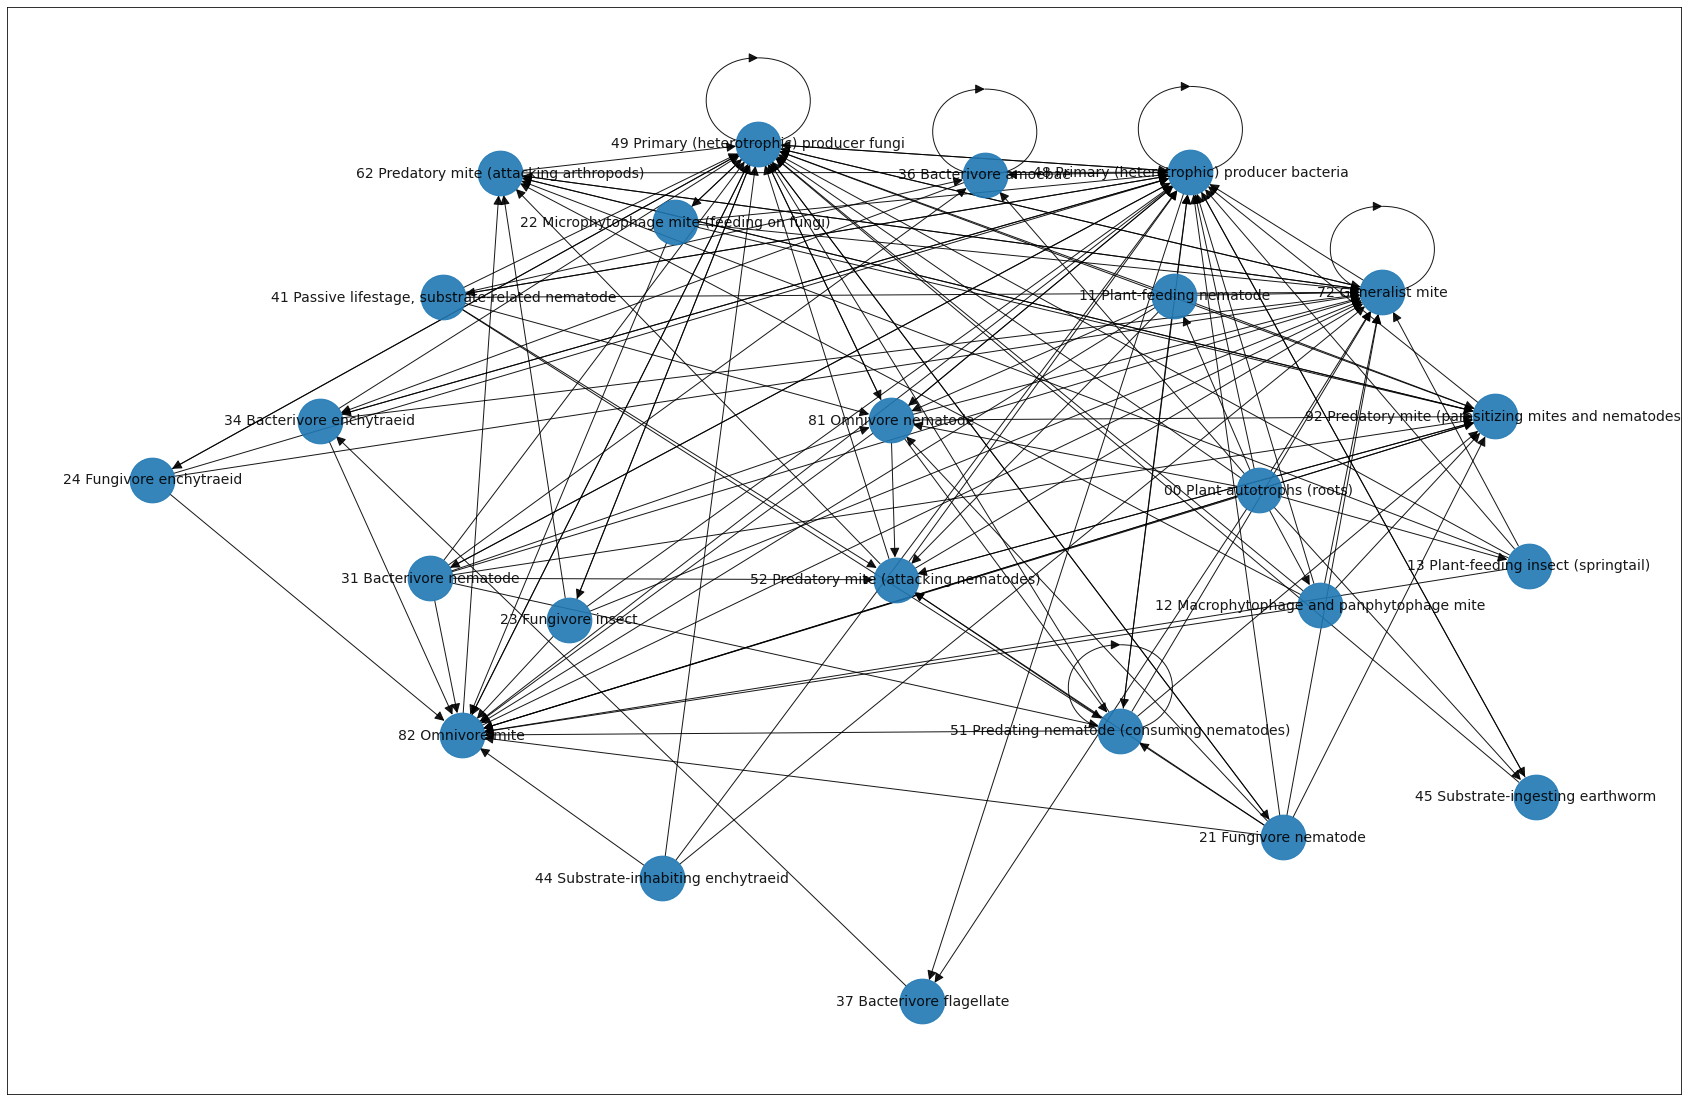

In [313]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=20, node_size=2000, alpha=0.9, font_size=14)
f.savefig("sf_network_2")

In [314]:
print(f"num of nodes: {G.number_of_nodes()}, num of edges: {G.number_of_edges()}, num of avg node degree {G.number_of_edges() / G.number_of_nodes():.2f}")

num of nodes: 24, num of edges: 136, num of avg node degree 5.67


In [458]:
# calculate degree centrality
dc = nx.degree_centrality(G)
# Sort by key value
sorted(dc.items(), key=lambda item: item[1], reverse=True)

[('48 Primary (heterotrophic) producer bacteria', 1.3478260869565217),
 ('49 Primary (heterotrophic) producer fungi', 1.3478260869565217),
 ('72 Generalist mite', 1.0),
 ('82 Omnivore mite', 0.8695652173913043),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.6521739130434783),
 ('81 Omnivore nematode', 0.6086956521739131),
 ('51 Predating nematode (consuming nematodes)', 0.5652173913043478),
 ('52 Predatory mite (attacking nematodes)', 0.5217391304347826),
 ('00 Plant autotrophs (roots)', 0.4782608695652174),
 ('62 Predatory mite (attacking arthropods)', 0.4782608695652174),
 ('31 Bacterivore nematode', 0.43478260869565216),
 ('11 Plant-feeding nematode', 0.3913043478260869),
 ('21 Fungivore nematode', 0.3913043478260869),
 ('41 Passive lifestage, substrate-related nematode', 0.34782608695652173),
 ('34 Bacterivore enchytraeid', 0.30434782608695654),
 ('12 Macrophytophage and panphytophage mite', 0.30434782608695654),
 ('36 Bacterivore amoebae', 0.30434782608695654),
 ('23

In [456]:
# calculate in-degree centrality
ind = nx.in_degree_centrality(G)
# Sort by key value
sorted(ind.items(), key=lambda item: item[1], reverse=True)

[('48 Primary (heterotrophic) producer bacteria', 0.9565217391304348),
 ('49 Primary (heterotrophic) producer fungi', 0.9565217391304348),
 ('72 Generalist mite', 0.8260869565217391),
 ('82 Omnivore mite', 0.6521739130434783),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.43478260869565216),
 ('81 Omnivore nematode', 0.30434782608695654),
 ('62 Predatory mite (attacking arthropods)', 0.30434782608695654),
 ('52 Predatory mite (attacking nematodes)', 0.30434782608695654),
 ('51 Predating nematode (consuming nematodes)', 0.2608695652173913),
 ('36 Bacterivore amoebae', 0.21739130434782608),
 ('34 Bacterivore enchytraeid', 0.13043478260869565),
 ('45 Substrate-ingesting earthworm', 0.08695652173913043),
 ('37 Bacterivore flagellate', 0.08695652173913043),
 ('11 Plant-feeding nematode', 0.043478260869565216),
 ('31 Bacterivore nematode', 0.043478260869565216),
 ('23 Fungivore insect', 0.043478260869565216),
 ('24 Fungivore enchytraeid', 0.043478260869565216),
 ('21 Fungivore 

In [457]:
# calculate out degree
od = nx.out_degree_centrality(G)
# Sort by key value
sorted(od.items(), key=lambda item: item[1], reverse=True)

[('00 Plant autotrophs (roots)', 0.4782608695652174),
 ('31 Bacterivore nematode', 0.3913043478260869),
 ('48 Primary (heterotrophic) producer bacteria', 0.3913043478260869),
 ('49 Primary (heterotrophic) producer fungi', 0.3913043478260869),
 ('11 Plant-feeding nematode', 0.34782608695652173),
 ('21 Fungivore nematode', 0.34782608695652173),
 ('81 Omnivore nematode', 0.30434782608695654),
 ('51 Predating nematode (consuming nematodes)', 0.30434782608695654),
 ('41 Passive lifestage, substrate-related nematode', 0.30434782608695654),
 ('12 Macrophytophage and panphytophage mite', 0.2608695652173913),
 ('23 Fungivore insect', 0.21739130434782608),
 ('13 Plant-feeding insect (springtail)', 0.21739130434782608),
 ('82 Omnivore mite', 0.21739130434782608),
 ('22 Microphytophage mite (feeding on fungi)', 0.21739130434782608),
 ('52 Predatory mite (attacking nematodes)', 0.21739130434782608),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.21739130434782608),
 ('24 Fungivore ench

In [449]:
# Check if graph is bipartite
nx.is_bipartite(G)

False

In [448]:
# Betweenes Centrality meassure
bc = nx.betweenness_centrality(G)
# Sort by key value
sorted(bc.items(), key=lambda item: item[1], reverse=True)

[('48 Primary (heterotrophic) producer bacteria', 0.2868059476755128),
 ('49 Primary (heterotrophic) producer fungi', 0.22108977978543198),
 ('34 Bacterivore enchytraeid', 0.06834650856389987),
 ('81 Omnivore nematode', 0.0283690946734425),
 ('82 Omnivore mite', 0.026289290419725202),
 ('92 Predatory mite (parasitizing mites and nematodes)',
  0.016379634857895727),
 ('31 Bacterivore nematode', 0.012916431394692264),
 ('21 Fungivore nematode', 0.011664784490871449),
 ('72 Generalist mite', 0.011528326745718047),
 ('41 Passive lifestage, substrate-related nematode', 0.010841332580463018),
 ('62 Predatory mite (attacking arthropods)', 0.005340673818934688),
 ('52 Predatory mite (attacking nematodes)', 0.005006587615283267),
 ('36 Bacterivore amoebae', 0.0026350461133069825),
 ('11 Plant-feeding nematode', 0.002470355731225296),
 ('23 Fungivore insect', 0.0014492753623188404),
 ('51 Predating nematode (consuming nematodes)', 0.0013175230566534913),
 ('12 Macrophytophage and panphytophage 

In [447]:
# Closseness Centrality meassure
cc = nx.closeness_centrality(G)
# Sort by key value
sorted(cc.items(), key=lambda item: item[1], reverse=True)

[('48 Primary (heterotrophic) producer bacteria', 0.92),
 ('49 Primary (heterotrophic) producer fungi', 0.92),
 ('72 Generalist mite', 0.8214285714285714),
 ('82 Omnivore mite', 0.7419354838709677),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.5897435897435898),
 ('81 Omnivore nematode', 0.5609756097560976),
 ('34 Bacterivore enchytraeid', 0.5348837209302325),
 ('36 Bacterivore amoebae', 0.5348837209302325),
 ('62 Predatory mite (attacking arthropods)', 0.5348837209302325),
 ('37 Bacterivore flagellate', 0.5111111111111111),
 ('45 Substrate-ingesting earthworm', 0.5),
 ('31 Bacterivore nematode', 0.48936170212765956),
 ('23 Fungivore insect', 0.48936170212765956),
 ('24 Fungivore enchytraeid', 0.48936170212765956),
 ('21 Fungivore nematode', 0.48936170212765956),
 ('41 Passive lifestage, substrate-related nematode', 0.48936170212765956),
 ('22 Microphytophage mite (feeding on fungi)', 0.48936170212765956),
 ('52 Predatory mite (attacking nematodes)', 0.46),
 ('51 Predati

In [445]:
# Get the PageRank
pr = nx.pagerank(G)
# Sort by key value
sorted(pr.items(), key=lambda item: item[1], reverse=True)

[('48 Primary (heterotrophic) producer bacteria', 0.15086039833008402),
 ('49 Primary (heterotrophic) producer fungi', 0.15086039833008402),
 ('72 Generalist mite', 0.11856584449748468),
 ('82 Omnivore mite', 0.06958246961922676),
 ('62 Predatory mite (attacking arthropods)', 0.06316415921028297),
 ('34 Bacterivore enchytraeid', 0.057108266830798844),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.05370233438680672),
 ('36 Bacterivore amoebae', 0.04418228503909837),
 ('81 Omnivore nematode', 0.042547213117951205),
 ('52 Predatory mite (attacking nematodes)', 0.030453815491161038),
 ('51 Predating nematode (consuming nematodes)', 0.021324207108836236),
 ('45 Substrate-ingesting earthworm', 0.020980933959318604),
 ('37 Bacterivore flagellate', 0.020980933959318604),
 ('31 Bacterivore nematode', 0.02049797941386406),
 ('23 Fungivore insect', 0.02049797941386406),
 ('24 Fungivore enchytraeid', 0.02049797941386406),
 ('21 Fungivore nematode', 0.02049797941386406),
 ('41 Passive

# Prepare dataset for each plot (A,B,C) with avg biomass and Mass of OTU agregated on trophic ID level

#### Plot A

In [316]:
# Create df for Plot A
df_field_a = df_field[df_field["Plot_ID"] == "A"].copy()
# Sort by OTU
df_field_a.sort_values("OTU", inplace=True)

# Remove log from biomass 
df_field_a["Biomass"] = 10**(df_field_a["Log10(Biomass)"])
df_field_a["Mass"] = 10**(df_field_a["Log10(Mass)"])

# List of OTUs
OTUs = df_field_a.OTU.unique()
print(f"Number of OTUs in plot A: {len(OTUs)}")

# # Create dictionary for number of times an organism appears (nr. of replicates)
# vc = df_field_a.OTU.value_counts()
# vc = vc.to_dict()

pd.set_option("max_rows", 15)
df_field_a.Biomass = df_field_a.Biomass
df_field_a.Mass = df_field_a.Mass
df_field_a

Number of OTUs in plot A: 96


,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH,Biomass,Mass
132,133,A,1,A1,Mesofauna,Enchytraeidae,Achaeta,Fungivore enchytraeid,24,24001,2,3.15,0.44,3.59,1916.67,173.57,18.86,5.0,3890.451450,2.754229
133,134,A,1,A1,Mesofauna,Enchytraeidae,Achaeta abulba,Fungivore enchytraeid,24,24001,2,3.15,0.77,3.92,1916.67,173.57,18.86,5.0,8317.637711,5.888437
147,148,A,3,A3,Mesofauna,Enchytraeidae,Achaeta abulba,Fungivore enchytraeid,24,24001,2,2.85,0.77,3.62,3083.33,171.43,16.19,4.9,4168.693835,5.888437
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0,15488.166189,20.417379
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0,10471.285481,13.803843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297,A,1,A1,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,5.28,-0.66,4.62,1916.67,173.57,18.86,5.0,41686.938347,0.218776
329,330,A,2,A2,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,4.65,-0.66,3.99,2416.67,167.86,17.60,5.0,9772.372210,0.218776
368,369,A,3,A3,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,3.94,-0.66,3.28,3083.33,171.43,16.19,4.9,1905.460718,0.218776
18,19,A,3,A3,Mesofauna,Acarina,Tyrophagus,Microphytophage mite (feeding on fungi),22,22140,2,2.88,0.73,3.61,3083.33,171.43,16.19,4.9,4073.802778,5.370318


In [443]:
df_field_a[df_field_a.Trophic_ID == "48"]

,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH,Biomass,Mass
65,66,A,2,A2,Bacteria,Bacteria,Bacteria,Primary (heterotrophic) producer,48,48000,1,14.08,-6.98,7.10,2416.67,167.86,17.60,5.0,1.258925e+07,1.047129e-07
66,67,A,3,A3,Bacteria,Bacteria,Bacteria,Primary (heterotrophic) producer,48,48000,1,13.93,-7.06,6.87,3083.33,171.43,16.19,4.9,7.413102e+06,8.709636e-08
64,65,A,1,A1,Bacteria,Bacteria,Bacteria,Primary (heterotrophic) producer,48,48000,1,13.88,-6.96,6.92,1916.67,173.57,18.86,5.0,8.317638e+06,1.096478e-07


In [317]:
# Calculate the aggregated biomas per Trophic_ID

# Create dictionary OTU-> Trophic_ID
OTU2trophicID = pd.Series(df_field_a.Trophic_ID.values, df_field_a.OTU.values).to_dict()

# Calcualte avg biomas by OTU group
df_group_A_bm = df_field_a.groupby(["OTU"], as_index=False).Biomass.mean()
df_group_A_bm.Biomass = df_group_A_bm.Biomass.round(2)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_bm["OTU"].iteritems():
    df_group_A_bm.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_bm = df_group_A_bm.groupby("Trophic_ID", as_index=False).Biomass.sum()
df_group_A_bm

# pd.set_option("max_rows", None)

# Create dictionary for avg biomass feature
avg_biomass_A = pd.Series(df_group_A_bm.Biomass.values, df_group_A_bm.Trophic_ID.values).to_dict()

#Change key "#0" to 00
avg_biomass_A["00"] = avg_biomass_A.pop("#0")

avg_biomass_A

{'11': 479278.83999999997,
 '12': 15889.73,
 '13': 12483.4,
 '21': 17869.440000000002,
 '22': 15405.630000000001,
 '23': 87314.16,
 '24': 666025.6699999999,
 '31': 97189.95,
 '34': 116602.3,
 '36': 430441.33,
 '37': 147631.77,
 '41': 11682.96,
 '44': 213718.46000000002,
 '45': 20876194.67,
 '48': 9439998.08,
 '49': 13499166.6,
 '51': 43024.240000000005,
 '52': 1230.27,
 '62': 3162.28,
 '72': 31643.86,
 '81': 301148.6,
 '82': 18770.75,
 '00': 839114314.65}

In [318]:
# Calculate the aggregated mass per Trophic_ID

# Calcualte avg mass by OTU group
df_group_A_m = df_field_a.groupby(["OTU"], as_index=False).Mass.mean()
# df_group_A_m.Mass = df_group_A_m.Mass.round(4)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_m["OTU"].iteritems():
    df_group_A_m.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_m = df_group_A_m.groupby("Trophic_ID", as_index=False).Mass.sum()
df_group_A_m

# pd.set_option("max_rows", None)

# Create dictionary for avg mass feature
avg_mass_A = pd.Series(df_group_A_m.Mass.values, df_group_A_m.Trophic_ID.values).to_dict()

#Change key "#0" to 00
avg_mass_A["00"] = avg_mass_A.pop("#0")

avg_mass_A

{'11': 6.031837019417812,
 '12': 21.4219765600248,
 '13': 8.82985650742963,
 '21': 0.060594173232088044,
 '22': 20.308585374564515,
 '23': 123.42029317311494,
 '24': 469.51500281899325,
 '31': 0.44778320101132774,
 '34': 33.14754099441857,
 '36': 4.332808765847162e-05,
 '37': 5.581738950174688e-06,
 '41': 0.03982475480481081,
 '44': 109.48778868944353,
 '45': 656677.5800017535,
 '48': 1.004856778050055e-07,
 '49': 13499166.596358478,
 '51': 0.532567889263113,
 '52': 1.62181009735893,
 '62': 8.31763771102671,
 '72': 58.23197646335491,
 '81': 1.6196323444430343,
 '82': 19.50319135008504,
 '00': 839114314.6535658}

In [441]:
13499166.596358478 / 1.004856778050055e-07

134339210236048.62

In [438]:
13499166.596358478 / 0.00000001

1349916659635847.8

In [463]:
# Unify node names and Trophic_ID names in Biomass dict
for key_attr in list(avg_biomass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_biomass_A[key_node] = avg_biomass_A.pop(key_attr)
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_biomass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
dict(sorted(avg_biomass_A.items(), key=lambda item: item[1]))

{'92 Predatory mite (parasitizing mites and nematodes)': 0,
 '52 Predatory mite (attacking nematodes)': 1230.27,
 '62 Predatory mite (attacking arthropods)': 3162.28,
 '41 Passive lifestage, substrate-related nematode': 11682.96,
 '13 Plant-feeding insect (springtail)': 12483.4,
 '22 Microphytophage mite (feeding on fungi)': 15405.630000000001,
 '12 Macrophytophage and panphytophage mite': 15889.73,
 '21 Fungivore nematode': 17869.440000000002,
 '82 Omnivore mite': 18770.75,
 '72 Generalist mite': 31643.86,
 '51 Predating nematode (consuming nematodes)': 43024.240000000005,
 '23 Fungivore insect': 87314.16,
 '31 Bacterivore nematode': 97189.95,
 '34 Bacterivore enchytraeid': 116602.3,
 '37 Bacterivore flagellate': 147631.77,
 '44 Substrate-inhabiting enchytraeid': 213718.46000000002,
 '81 Omnivore nematode': 301148.6,
 '36 Bacterivore amoebae': 430441.33,
 '11 Plant-feeding nematode': 479278.83999999997,
 '24 Fungivore enchytraeid': 666025.6699999999,
 '48 Primary (heterotrophic) produ

In [320]:
# Unify node names and Trophic_ID names in Mass dict
for key_attr in list(avg_mass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_mass_A[key_node] = avg_mass_A.pop(key_attr)
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_mass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
dict(sorted(avg_mass_A.items(), key=lambda item: item[1]))

{'92 Predatory mite (parasitizing mites and nematodes)': 0,
 '48 Primary (heterotrophic) producer bacteria': 1.004856778050055e-07,
 '37 Bacterivore flagellate': 5.581738950174688e-06,
 '36 Bacterivore amoebae': 4.332808765847162e-05,
 '41 Passive lifestage, substrate-related nematode': 0.03982475480481081,
 '21 Fungivore nematode': 0.060594173232088044,
 '31 Bacterivore nematode': 0.44778320101132774,
 '51 Predating nematode (consuming nematodes)': 0.532567889263113,
 '81 Omnivore nematode': 1.6196323444430343,
 '52 Predatory mite (attacking nematodes)': 1.62181009735893,
 '11 Plant-feeding nematode': 6.031837019417812,
 '62 Predatory mite (attacking arthropods)': 8.31763771102671,
 '13 Plant-feeding insect (springtail)': 8.82985650742963,
 '82 Omnivore mite': 19.50319135008504,
 '22 Microphytophage mite (feeding on fungi)': 20.308585374564515,
 '12 Macrophytophage and panphytophage mite': 21.4219765600248,
 '34 Bacterivore enchytraeid': 33.14754099441857,
 '72 Generalist mite': 58.23

In [462]:
109.48778868944353 / 13499166.596358478

8.11070727277185e-06

In [321]:
# Add biomas as attribute
nx.set_node_attributes(G, avg_biomass_A, "Biomass")
# Add mass as attribute
nx.set_node_attributes(G, avg_mass_A, "Mass")
G.nodes(data=True)

NodeDataView({'11 Plant-feeding nematode': {'Biomass': 479278.83999999997, 'Mass': 6.031837019417812}, '31 Bacterivore nematode': {'Biomass': 97189.95, 'Mass': 0.44778320101132774}, '45 Substrate-ingesting earthworm': {'Biomass': 20876194.67, 'Mass': 656677.5800017535}, '23 Fungivore insect': {'Biomass': 87314.16, 'Mass': 123.42029317311494}, '24 Fungivore enchytraeid': {'Biomass': 666025.6699999999, 'Mass': 469.51500281899325}, '21 Fungivore nematode': {'Biomass': 17869.440000000002, 'Mass': 0.060594173232088044}, '81 Omnivore nematode': {'Biomass': 301148.6, 'Mass': 1.6196323444430343}, '13 Plant-feeding insect (springtail)': {'Biomass': 12483.4, 'Mass': 8.82985650742963}, '44 Substrate-inhabiting enchytraeid': {'Biomass': 213718.46000000002, 'Mass': 109.48778868944353}, '51 Predating nematode (consuming nematodes)': {'Biomass': 43024.240000000005, 'Mass': 0.532567889263113}, '72 Generalist mite': {'Biomass': 31643.86, 'Mass': 58.23197646335491}, '34 Bacterivore enchytraeid': {'Bioma

'92 Predatory mite (parasitizing mites and nematodes)' was not detected in Plot A and C and has no biomass feature.

# Prepare dataset for each plot (A,B,C) with Mass ratios as edge weights

In [390]:
# Calculate Mass ratios of neigbouring nodes
# get list od edges
edge_list = list(G.edges())

# Create a dict of edge tuples (keys) to Mass ratios (edge attribute values)
mass_ratios_dict = {}
for edge_tuple in edge_list:
    consumer = G.nodes[edge_tuple[1]]["Mass"]
    resource = G.nodes[edge_tuple[0]]["Mass"]
    if resource == 0:
        resource += 0.00000001
    # calculate the Mass ratio consumer/resource  
    mass_ratio = consumer/resource
    mass_ratios_dict[edge_tuple] = mass_ratio

# Add Mass ratios as attribute to edges
nx.set_edge_attributes(G, mass_ratios_dict, name="mass_ratio")

In [439]:
df_mass_ratios = pd.DataFrame.from_dict(mass_ratios_dict, orient="index", columns=["mass_ratio"])
df_mass_ratios.index.name = "edges (resource, consumer)"

In [460]:
pd.set_option("max_rows", None)
df_mass_ratios = df_mass_ratios.sort_values("mass_ratio", ascending=False)
df_mass_ratios

,mass_ratio
"edges (resource, consumer)",
"(92 Predatory mite (parasitizing mites and nematodes), 49 Primary (heterotrophic) producer fungi)",1.349917e+15
"(48 Primary (heterotrophic) producer bacteria, 49 Primary (heterotrophic) producer fungi)",1.343392e+14
"(48 Primary (heterotrophic) producer bacteria, 45 Substrate-ingesting earthworm)",6.535037e+12
"(92 Predatory mite (parasitizing mites and nematodes), 82 Omnivore mite)",1.950319e+09
"(92 Predatory mite (parasitizing mites and nematodes), 62 Predatory mite (attacking arthropods))",8.317638e+08
"(41 Passive lifestage, substrate-related nematode, 49 Primary (heterotrophic) producer fungi)",3.389642e+08
"(48 Primary (heterotrophic) producer bacteria, 34 Bacterivore enchytraeid)",3.298733e+08
"(21 Fungivore nematode, 49 Primary (heterotrophic) producer fungi)",2.227799e+08
"(92 Predatory mite (parasitizing mites and nematodes), 52 Predatory mite (attacking nematodes))",1.621810e+08


In [444]:
df_mass_ratios.to_csv("SFW_mass_ratios_1.csv", sep=";")

In [328]:
list(G.edges(data=True))[:5]

[('11 Plant-feeding nematode',
  '81 Omnivore nematode',
  {'mass_ratio': 0.2685139434684792}),
 ('11 Plant-feeding nematode',
  '51 Predating nematode (consuming nematodes)',
  {'mass_ratio': 0.0882928181826962}),
 ('11 Plant-feeding nematode',
  '72 Generalist mite',
  {'mass_ratio': 9.654103099253735}),
 ('11 Plant-feeding nematode',
  '82 Omnivore mite',
  {'mass_ratio': 3.233375054282795}),
 ('11 Plant-feeding nematode',
  '48 Primary (heterotrophic) producer bacteria',
  {'mass_ratio': 1.665921633517616e-08})]

### Plot distribution of mass ratios

In [335]:
# Create a series of Mass ratios (edge weighs)
MR_series = pd.Series(mass_ratios_dict.values())
MR_series.describe()

count    1.360000e+02
mean     1.096173e+13
std      1.162380e+14
min      0.000000e+00
25%      6.755828e-08
50%      1.000000e+00
75%      1.145177e+02
max      1.349917e+15
dtype: float64

In [349]:
MR_series.sort_values()

77     0.000000e+00
35     0.000000e+00
58     0.000000e+00
16     0.000000e+00
121    0.000000e+00
           ...     
134    8.317638e+08
131    1.950319e+09
101    6.535037e+12
107    1.343392e+14
133    1.349917e+15
Length: 136, dtype: float64

<AxesSubplot:>

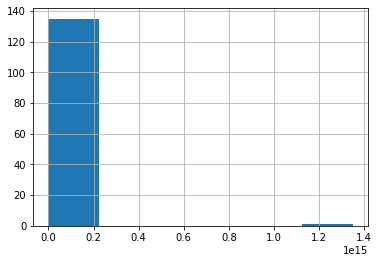

In [353]:
MR_series.hist(bins=6)

# Visaulise Graph A with Biomass

In [274]:
# Prepare biomass feature values
biomass_array = np.array(list(avg_biomass_A.values()))
biomass_array

array([4.79278840e+05, 1.58897300e+04, 1.24834000e+04, 1.78694400e+04,
       1.54056300e+04, 8.73141600e+04, 6.66025670e+05, 9.71899500e+04,
       1.16602300e+05, 4.30441330e+05, 1.47631770e+05, 1.16829600e+04,
       2.13718460e+05, 2.08761947e+07, 9.43999808e+06, 1.34991666e+07,
       4.30242400e+04, 1.23027000e+03, 3.16228000e+03, 3.16438600e+04,
       3.01148600e+05, 1.87707500e+04, 8.39114315e+08, 0.00000000e+00])

In [275]:
array_log = 100*np.log2(biomass_array)
# np.interp(array, (array.min(), array.max()), (0, 5))
list_log = list(array_log)
list_log.sort()
print(list_log)

[-inf, 1026.4759254628439, 1162.6749399583894, 1351.2118221944004, 1360.772330213816, 1391.1170060906993, 1395.5806990014958, 1412.520680285543, 1419.6198674878806, 1494.963797377215, 1539.2862087610044, 1641.392801857265, 1656.8519518125572, 1683.1236720658478, 1717.164369373056, 1770.5352001059903, 1820.0116026474927, 1871.5457083287074, 1887.0505721297625, 1934.521825724087, 2317.035513548176, 2368.6367006364612, 2431.5355424440977, 2964.429212512077]


/var/folders/4p/mr19cxrs6_z3dsfws0cjcwfw0000gn/T/ipykernel_16138/11232855.py:1: RuntimeWarning: divide by zero encountered in log2
  array_log = 100*np.log2(biomass_array)


In [381]:
# np. linspace
# Rescale Biomass feature by standardisation

OldMax = np.amax(biomass_array)
OldMin = np.amin(biomass_array)
NewMax = 100000
NewMin = 1000

OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  

bm_array_stand = []
for OldValue in biomass_array:
    bm_array_stand.append((((OldValue - OldMin) * NewRange) / OldRange) + NewMin)
bm_array_stand = np.array(bm_array_stand)

list_stand = list(bm_array_stand)
list_stand.sort()
print(list_stand)

[1000.0, 1000.1451491505669, 1000.3730906677841, 1001.378373625389, 1001.4728107701458, 1001.8175799689893, 1001.8746948330349, 1002.1082640697625, 1002.2146020125698, 1003.7333913690969, 1005.0760661397806, 1010.3014591564983, 1011.4666200802608, 1013.7569190495992, 1017.4178237396609, 1025.2148332719426, 1035.5299759275772, 1050.7841314657758, 1056.5460561589766, 1078.5787349575874, 2113.7455214428214, 2592.652479009881, 3463.0056194334525, 100000.0]


/Users/mmarzi/.pyenv/versions/3.8.0/envs/graphs/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/mmarzi/.pyenv/versions/3.8.0/envs/graphs/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:743: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


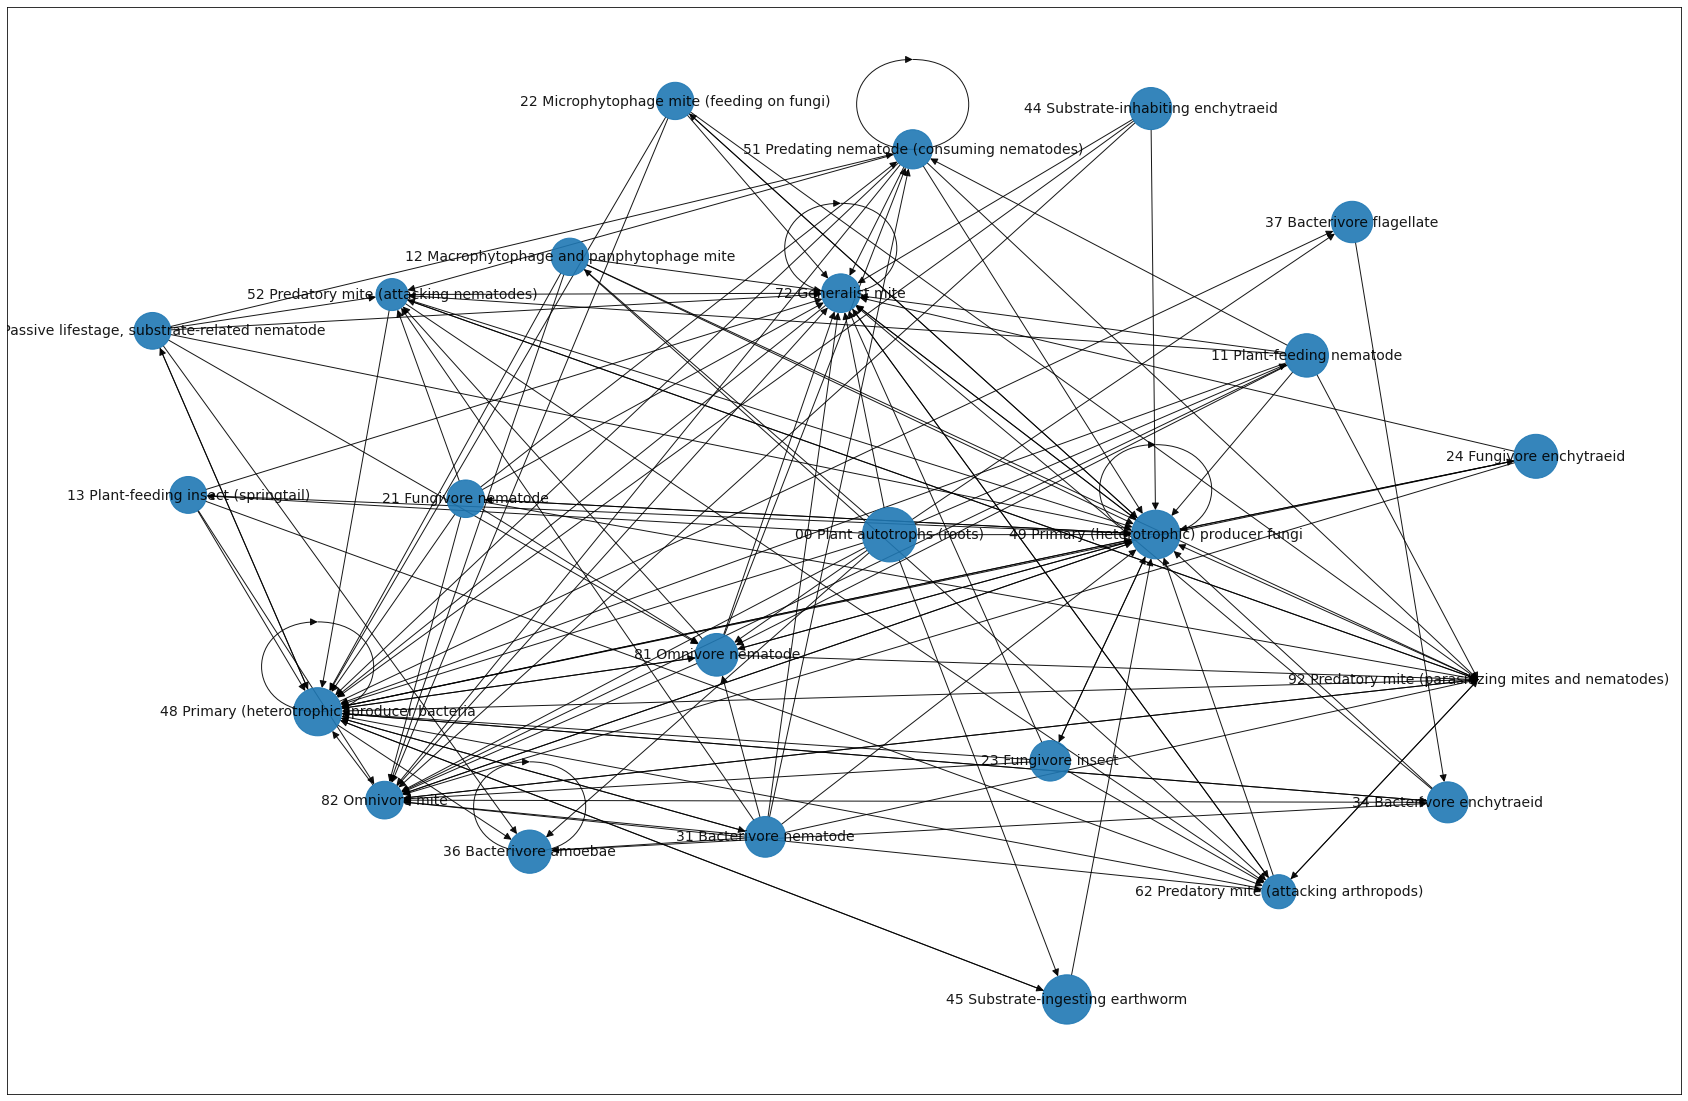

In [279]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=15, nodelist=list(avg_biomass_A.keys()), node_size=array_log, alpha=0.9, font_size=14)
# f.savefig("sf_network_6_log")

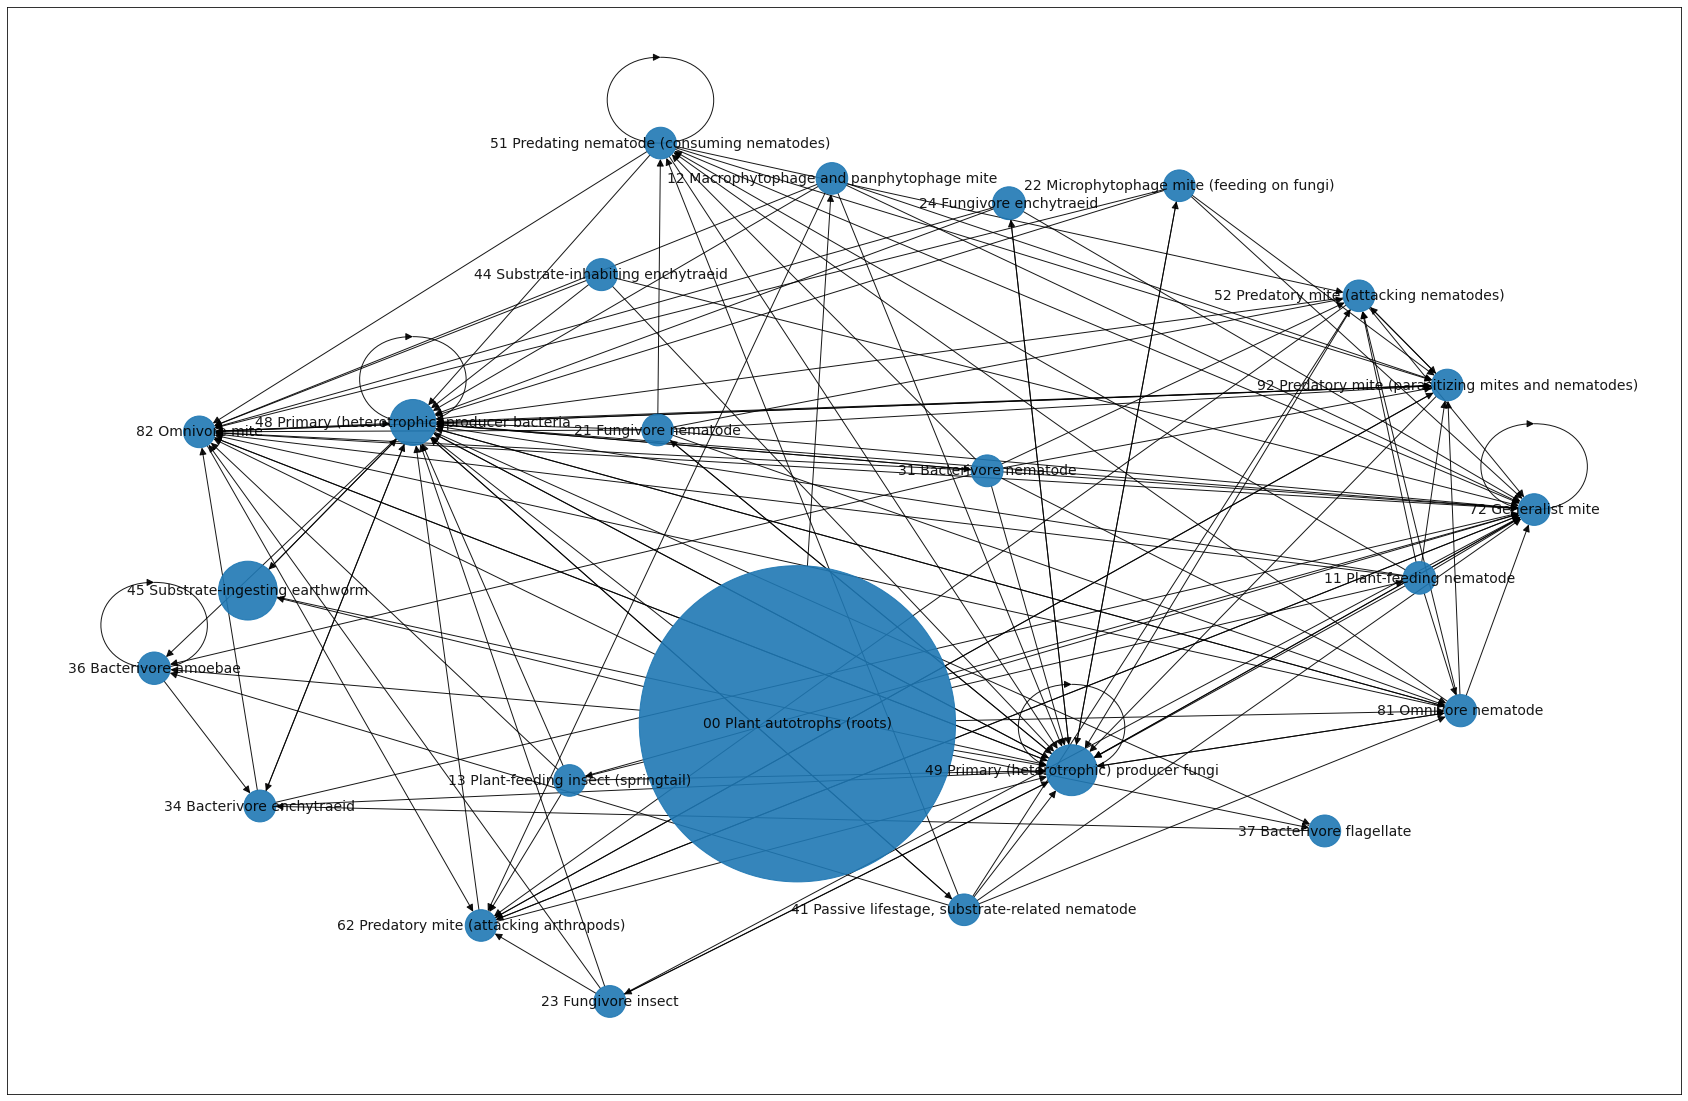

In [280]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=15, nodelist=list(avg_biomass_A.keys()), node_size=bm_array_stand, alpha=0.9, font_size=14)
# f.savefig("sf_network_4")

## Visualise graph with edge weights

In [357]:
# Prepare mass feature values
mass_array = np.array(MR_series)
mass_array

array([2.68513943e-01, 8.82928182e-02, 9.65410310e+00, 3.23337505e+00,
       1.66592163e-08, 2.23798597e+06, 2.68874987e-01, 0.00000000e+00,
       3.61700113e+00, 1.18934316e+00, 1.30045023e+02, 4.35549867e+01,
       9.67613067e-05, 2.24406984e-07, 3.01466571e+07, 3.62186454e+00,
       0.00000000e+00, 1.53021332e-13, 2.05567649e+01, 4.71818491e-01,
       1.58022565e-01, 8.14174681e-10, 1.09375584e+05, 6.73927885e-02,
       1.24025806e-01, 4.15390163e-02, 2.14020164e-10, 2.87512998e+04,
       2.67291764e+01, 8.78909408e+00, 9.61016107e+02, 3.21865789e+02,
       1.65833895e-06, 2.22779945e+08, 2.67651164e+01, 0.00000000e+00,
       3.28820236e-01, 3.59538241e+01, 1.20417399e+01, 6.20422765e-08,
       8.33471043e+06, 1.00134460e+00, 0.00000000e+00, 6.59489499e+00,
       2.20877784e+00, 1.13802164e-08, 1.52880928e+06, 9.41990134e-01,
       5.31858184e-01, 1.78131202e-01, 9.17779773e-10, 1.23293810e+05,
       1.00000000e+00, 1.09341884e+02, 3.66210426e+01, 1.88681443e-07,
      

In [ ]:
# mass_array_log = 100*np.log2(mass_array)
# # np.interp(array, (array.min(), array.max()), (0, 5))
# mass_list_log = list(mass_array_log)
# mass_list_log.sort()
# print(mass_list_log)
# len(mass_list_log)

In [385]:
# np. linspace
# Rescale Mass ratio dege feature by standardisation

OldMax = np.amax(mass_array)
OldMin = np.amin(mass_array)
NewMax = 10
NewMin = 1

OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  

mass_array_stand = []
for OldValue in mass_array:
    mass_array_stand.append(((((OldValue - OldMin) * NewRange) / OldRange) + NewMin))
mass_array_stand = np.array(mass_array_stand)

mass_list_stand = list(mass_array_stand)
mass_list_stand.sort()
print(mass_list_stand)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0000000000000004, 1.0000000000000007, 1.0000000000000009, 1.0000000000000009, 1.000000000000001, 1.000000000000001, 1.0000000000000018, 1.0000000000000018, 1.0000000000000022, 1.0000000000000027, 1.0000000000000029, 1.000000000000003, 1.0000000000000036, 1.000000000000004, 1.000000000000006, 1.0000000000000062, 1.0000000000000064, 1.0000000000000067, 1.0000000000000067, 1.0000000000000067, 1.0000000000000067, 1.0000000000000067, 1.0000000000000067, 1.000000000000008, 1.0000000000000118, 1.0000000000000147, 1.0000000000000182, 1.000000000000019, 1.00000000000002, 1.0000000000000202, 1.0000000000000215, 1.0000000000000242, 1.0000000000000242, 1.0000000000000342, 1.000000000000044, 1.0000000000000466, 1.0000000000000586, 1.00

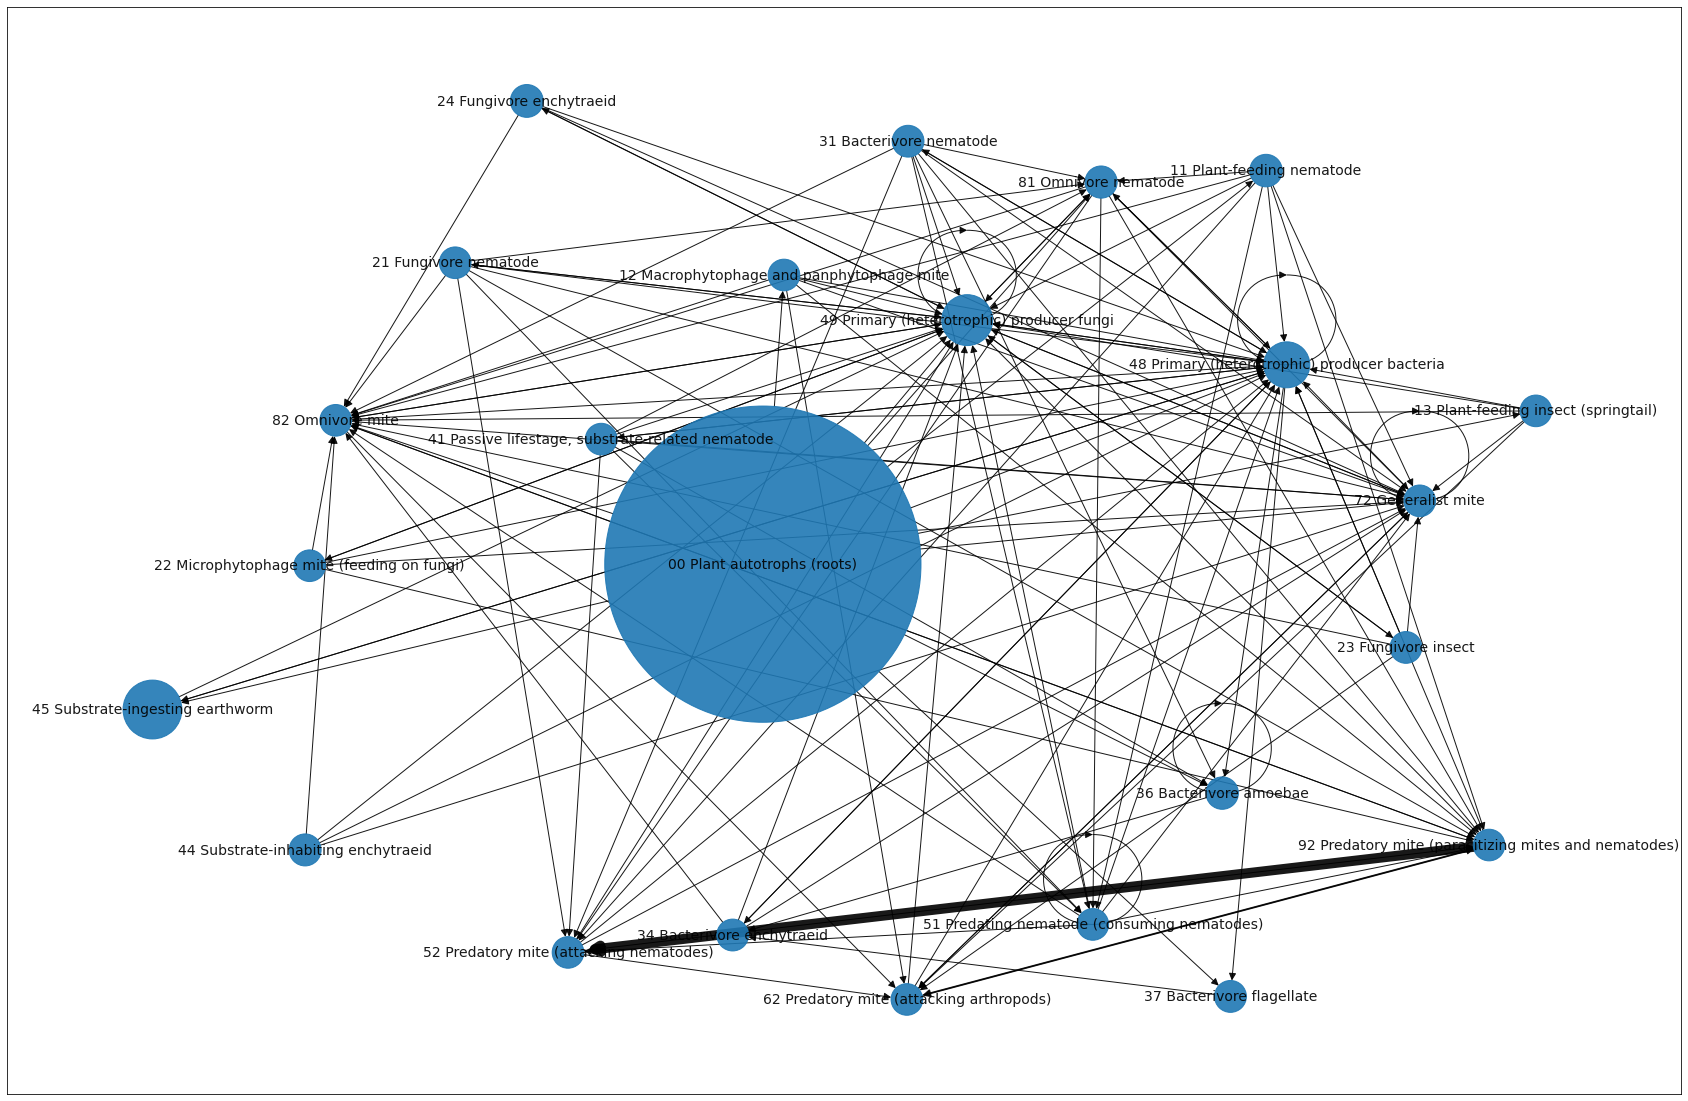

In [386]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, width=mass_list_stand,  arrowsize=15, nodelist=list(avg_biomass_A.keys()), node_size=bm_array_stand, alpha=0.9, font_size=14)
# f.savefig("sf_network_4")

In [173]:
# Marko: Zmanjšaj največjega
## Vid:  raje umatknil an rob; treba odstranit manjkajočega; nx.pagerank bojda lahko upošteva edge weight


In [161]:
# Nariši z graphviz ali gephi

In [162]:
# ali je biomasa nad 10% biomase s katerimi se prehranjujeo (verjetno edge attribute)

In [163]:
# page rank: uproabit random walk ki upoštevan atribute na povezavah (uteži)

In [164]:
# ?Flow network: Matrix: max and min flow; simulate flow using link weights; Check if usable for simulation
# try personalised pagerank (random walk pogojen s utežmi na povezavi)